## 1. Загрузим данные из файла HR.csv

In [73]:
import numpy as np
import pandas as pd

In [74]:
HR_data = pd.read_csv('https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1')
HR_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Проанализируем,насколько качественные данные в таблице

In [6]:
# Для начала проверим, какие типы данных в нашей таблице
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Все данные во всех столбцах имеют верный тип данных, в таблице нет пропусков. Далее посчитаем, сколько дубликатов в нашей таблице


In [7]:
len(HR_data)- len(HR_data.drop_duplicates())

3008

Т.к. набор данных для каждого отдельного сотрудника уникален, то можем предположить, что дубликаты - это ошибка в наборе данных, поэтому избавимся от них

# 2.Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [75]:
HR_data_1 = HR_data.drop_duplicates(keep='last').reset_index(drop=True)

In [9]:
HR_data_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.36,0.46,2,132,3,0,1,0,sales,low
1,0.44,0.57,2,131,3,0,1,0,sales,low
2,0.85,0.99,5,248,5,0,1,0,sales,low
3,0.78,0.93,5,225,5,0,1,0,sales,low
4,0.39,0.46,2,156,3,0,1,0,sales,low


In [78]:
HR_data_2 =HR_data_1[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
dfr = pd.DataFrame({
 'Показатель':  ['Максимум', 'Минимум','Среднее', 'Мода','Медиана','СКО']})
dfr=dfr.set_index('Показатель')


#Расчет статистики для 5 количественных показателей
max_ =HR_data_2.max()
min_ = HR_data_2.min()
mean_=HR_data_2.mean().round(2)
pr_2_ = HR_data_2.quantile(0.5).round(2)
std_ = HR_data_2.std().round(2)

# расчитаем отдельно моду
mode_1 = HR_data_2['satisfaction_level'].mode()[0].round(2)
mode_2 = HR_data_2['last_evaluation'].mode()[0].round(2)
mode_3 = HR_data_2['number_project'].mode()[0].round(2)
mode_4 = HR_data_2['average_montly_hours'].mode()[0].round(2)
mode_5 = HR_data_2['time_spend_company'].mode()[0].round(2)
#соберем результаты в Df
dfr.loc['Максимум',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]=max_
dfr.loc['Минимум',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]=min_
dfr.loc['Среднее',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]= mean_
dfr.loc['Мода',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]= [mode_1,mode_2,mode_3,mode_4,mode_5]
dfr.loc['Медиана',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]= pr_2_
dfr.loc['СКО',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]=std_
dfr



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
Показатель,,,,,
Максимум,1.00,1.00,7.00,310.00,10.00
Минимум,0.09,0.36,2.00,96.00,2.00
Среднее,0.63,0.72,3.80,200.47,3.36
Мода,0.74,0.55,4.00,149.00,3.00
Медиана,0.66,0.72,4.00,200.00,3.00
СКО,0.24,0.17,1.16,48.73,1.33


<span style="color:blue">Вывод: количественные данные "уровень удовлетворенности", "последняя аттестация",№количество проектов" и "стаж" - достаточно однородны, имеют малое СКО;   
однако данные в столбце- "среднее колчество часов" очень разнятся, есть смысл проанализировать глубже причины таких различий
</span>

# 3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
HR_data_2.corr().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000,0.095,-0.133,-0.006,-0.153
last_evaluation,0.095,1.000,0.270,0.265,0.097
number_project,-0.133,0.270,1.000,0.332,0.189
average_montly_hours,-0.006,0.265,0.332,1.000,0.103
time_spend_company,-0.153,0.097,0.189,0.103,1.000


<Axes: >

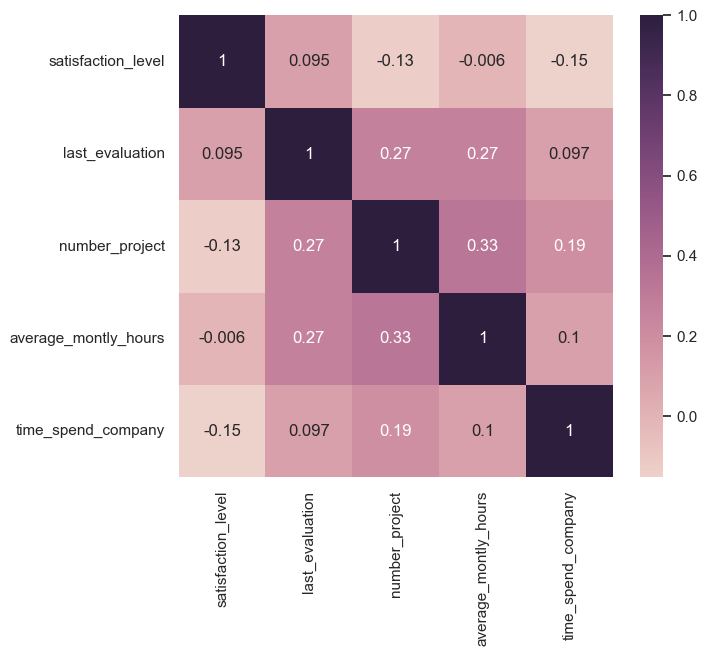

In [21]:
sns.set(rc={'figure.figsize':(7, 6)})
sns.heatmap(HR_data_2.corr().round(3), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

<span style="color:blue">Вывод:  
Наиболее скореллированные переменные: number_projects и average_montly_hours (0.332) (можно предположить, что более загруженные проектами спецы
тратят больше рабочего времени в месяц)  
Наименее скореллированные переменные: average_montly_hours и satisfaction_level (-0.006)
(можно предположить, что количество рабочего времени не влияет на уровень удовлетворенности специалистов)</span>


# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [81]:
Count_people =HR_data_1.groupby('department').count()
Count_people.rename(columns={'satisfaction_level': 'Count'}, inplace=True)
Count_people=Count_people[['Count']]
Count_people =Count_people.sort_values(by='Count',ascending=False)

Count_people

,Count
department,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


C:\Users\user\AppData\Local\Temp\ipykernel_19408\3409609695.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})


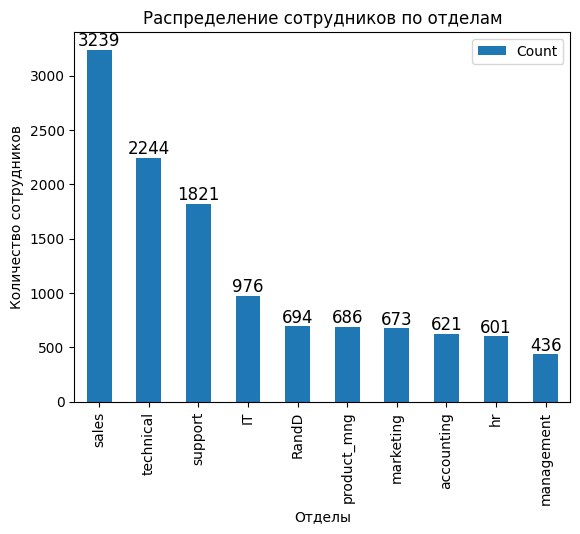

In [82]:

Count_people.plot(kind='bar', title='Распределение сотрудников по отделам',
                             xlabel='Отделы',
                             ylabel='Количество сотрудников')
for i, val in enumerate(Count_people.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

# 5 Показать распределение сотрудников по зарплатам.


In [13]:
HR_data_1['salary'].value_counts(normalize=True).round(3)

salary
low       0.479
medium    0.439
high      0.083
Name: proportion, dtype: float64

In [14]:
Count_salary =HR_data_1.groupby('salary').count()
Count_salary.rename(columns={'satisfaction_level': 'Count'}, inplace=True)
Count_salary=Count_salary[['Count']]
Count_salary =Count_salary.sort_values(by='Count',ascending=False)

Count_salary

,Count
salary,
low,5740
medium,5261
high,990


# 6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [15]:
pivot = HR_data_1.pivot_table(index='department', columns='salary',aggfunc='size')
pivot['count'] = pivot[['high','low','medium']].sum(axis=1)
pivot=pivot.sort_values(by='count',ascending=False)
pivot

salary,high,low,medium,count
department,,,,
sales,237,1553,1449,3239
technical,166,1138,940,2244
support,126,867,828,1821
IT,71,476,429,976
RandD,47,322,325,694
product_mng,52,343,291,686
marketing,62,310,301,673
accounting,63,296,262,621
hr,38,296,267,601


<Axes: xlabel='department'>

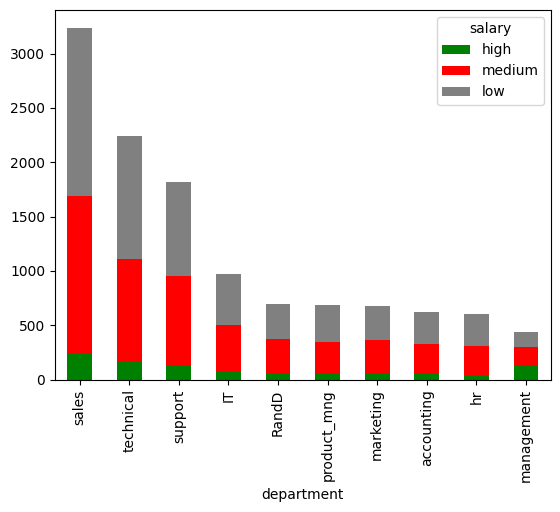

In [16]:
pivot[['high','medium','low',]].plot(kind='bar', stacked= True , color=['green', 'red','grey'])

<span style="color:blue">Вывод: в компании достаточно мало специалистов с высоким уровнем зп, все отделы имеют схожие пропорции распределения специалистов по уровню зп.</span>

# 7 Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низким окладом


H0-средние выборок одинаковы (сотрудики с высоким окладом проводят на работе столько же времени, сколько и сотрудники с низким окладом)  
H1-средние выборок различаются (сотрудники с разными окладами проводят на работе разное количество времени)

In [17]:
from scipy import stats

In [18]:
low_salary = HR_data_1['average_montly_hours'][HR_data_1['salary'] == 'low']
high_salary = HR_data_1['average_montly_hours'][HR_data_1['salary'] == 'high']

In [19]:
print(low_salary.mean())
print(high_salary.mean())

200.4391986062718
200.06767676767677


In [83]:
stat, p = stats.ttest_ind(low_salary,high_salary)
if p<0.05:
  print("Отклоняем нулевую гипотезу")
else:
  print("Не отклоняем нулевую гипотезу")

Не отклоняем нулевую гипотезу


<span style="color:blue">Вывод: гипотеза о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом не подтвердилась</span>

# 8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

- Доля сотрудников с повышением за последние 5 лет  
- Средняя степень удовлетворенности  
- Среднее количество проектов  


In [21]:
fired = HR_data_1[HR_data_1['left'] == 1]
working = HR_data_1[HR_data_1['left'] == 0]

In [62]:
ind = pd.DataFrame({
 'Показатель':  ['Доля сотрудников с повышением за последние 5 лет', 'Средняя степень удовлетворенности','Среднее количество проектов']})
ind=ind.set_index('Показатель')
ind.at['Доля сотрудников с повышением за последние 5 лет','Уволенные']=round(len(fired[fired['promotion_last_5years']==1].index)/len(fired),3)
ind.at['Доля сотрудников с повышением за последние 5 лет','Работают']=round(len(working[working['promotion_last_5years']==1].index)/len(working),3)
ind.at['Среднее количество проектов','Уволенные']=fired.number_project.mean().round(3)
ind.at['Среднее количество проектов','Работают']=working.number_project.mean().round(3)
ind.at['Средняя степень удовлетворенности','Уволенные']=fired.satisfaction_level.mean().round(3)
ind.at['Средняя степень удовлетворенности','Работают']=working.satisfaction_level.mean().round(3)
ind

,Уволенные,Работают
Показатель,,
Доля сотрудников с повышением за последние 5 лет,0.004,0.019
Средняя степень удовлетворенности,0.440,0.667
Среднее количество проектов,3.883,3.787


<span style="color:blue">Вывод: уволенные сотрудники имели в среднем более высокую нагрузку и меньший % повышений, что могло привести к снижению удовлетворенности работой</span>

# 9. Разделить данные на тестовую и обучающую выборки.Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).Оценить качество модели на тестовой выборки


In [41]:
from sklearn.model_selection import train_test_split

In [61]:
x = HR_data_1[['satisfaction_level','last_evaluation','number_project',
               'average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
y=HR_data_1['left']


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
lda = LinearDiscriminantAnalysis()

In [65]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [66]:
y_pred = lda.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
lda.score(x_test, y_test)

0.8342228152101401

In [68]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(y_test, lda.predict(x_test))

0.8342228152101401

<span style="color:blue">Построенная LDA модель адекватна и имеет достаточно высокую точность (83,4%)</span>